# 2025 October 1: Arrays and other fragments #

Will Clarkson, UM-Dearborn, Weds Oct 1, 2025

This notebook is intended to support homework 3 for ASTR 330 - The Cosmic Distance Scale - for the 2025 Fall semester, and is something of a "getting started with numpy and python" for this course. 

It shows how to do a few operations that will be useful to students taking this course. Although this is written in python, the same basic operations should also be useful for other vector-based libraries (e.g. I think MATLAB uses similar operations, though the syntax might be different).

In [1]:
# import a few things we'll need
import numpy as np
import matplotlib.pylab as plt

In [2]:
# matplotlib magic to display plots in this notebook
%matplotlib inline

## Generate an array of Gaussian random variates (one dimension) ##

In [3]:
# Generate an array of 1000 Gaussian random numbers with mean 300, stddev 10
#
# if we want exact reproducibility, we can set the random number seed to some number
#np.random.seed(123456789)
np.random.seed(None)
x1 = np.random.normal(300,10,1000)

In [4]:
# Did that do what we expected?
print(x1.shape)  # shape of the array - should be (1000,) if 1D with 1,000 points
print("Mean %.2f, stddev %.2f" % (np.mean(x1), np.std(x1))) # mean and standard deviation

(1000,)
Mean 299.81, stddev 10.00


## Generate three arrays of Gaussian random variates with the same width, do a few things with them ##

In [5]:
x1 = np.random.normal(300,10,1000)
x2 = np.random.normal(300,10,1000)
x3 = np.random.normal(300,10,1000)

In [6]:
# print their stddevs, using a loop to reduce typing:
for x in [x1, x2, x3]:
    print("stddev: %.2f" % np.std(x))

stddev: 10.09
stddev: 9.70
stddev: 10.01


In [7]:
# let's find the unweighted mean, element-by-element, and find its standard deviation
ssum = (x1+x2+x3) / 3.0
print(ssum.shape, "%.2f" % (np.std(ssum)))  # note that the result is still a 1,000-element array

(1000,) 5.79


There are a few ways we might handle the weighted sum of these arrays. Since all elements *within*
an array in this case have the same weight, we can simply use scalars for the weights, like so:

In [8]:
# one way to handle the weights (as inverse variance)
w1 = 1.0/10.**2
w2 = 1.0/10.**2
w3 = 1.0/10.**2

wsum = (x1*w1 + x2*w2 + x3*w3)/(w1+w2+w3)

For the equal-weight case here, this will produce identical results to the unweighted case. But you can easily see how to tweak this for the weighted case.

There are more elegant, pythonic ways to do this (to handle, e.g. hundreds of arrays with their own weights), but we don't need to go there for the homework at-hand.

## Plotting ##

In python, the most popular (by far!) plotting library is **matplotlib**, which implements an object-oriented plotting environment that is quite similar to Matlab (in fact the syntax might carry straight over to Matlab). Here are a few examples of common operations.

### Overplot the histograms of our three Gaussian random variables

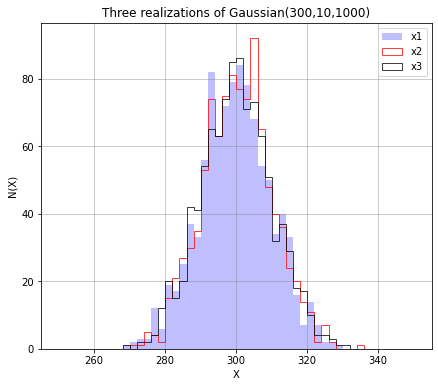

In [9]:
# We don't need to give the figure its own object and axes, but I find it helps to
# be able to refer to the axis later on if I want to change something. So it's a 
# good habit to get in to!
fig1=plt.figure(1, figsize=(7,6))
ax1=fig1.add_subplot(111)

# Let's impose uniform ranges on our histograms by specifying quantities to which
# we will refer later.
nbins = 50
xrange = (250,350)

h1 = ax1.hist(x1, color='blue', alpha=0.25, bins=nbins, range=xrange, label='x1', histtype='stepfilled', lw=2)
h2 = ax1.hist(x2, color='red', alpha=0.75, bins=nbins, range=xrange, label='x2', histtype='step')
h3 = ax1.hist(x3, color='k', alpha=0.75, bins=nbins, range=xrange, label='x3', histtype='step')

ax1.grid(alpha=0.5, color='0.5')

leg=ax1.legend()

ax1.set_xlabel('X')
ax1.set_ylabel('N(X)')
_ = ax1.set_title('Three realizations of Gaussian(300,10,1000)')

# let's save this to disk
fig1.savefig('test_histogram_example.png')

Python commands come with built-in help. Forgot what the various arguments meant? Uncomment the following line to see the help for the histogram command (i.e. remove the "#" and hit "Enter").

In [10]:
# help(plt.hist)

## Plotting data with errorbars in one dimension ##

In [11]:
# here we generate and plot measurements with some variable uncertainty in one dimension
np.random.seed(12345789) # for reproducibility
npts = 7
ymean = 5.
uncty_min = 0.1
uncty_max = 2.5

# now generate sample times and uncertainties 
t = np.sort(np.random.uniform(size=npts)*4.)
sigma = np.random.uniform(size=npts) * (uncty_max-uncty_min) + uncty_min

# we will measure ymean +/- sigma
ypertn = np.random.normal(size=np.size(t))*sigma

ytrue = np.repeat(ymean, np.size(t))
ymeas = ytrue + ypertn

In [12]:
# we might be curious: what's the inverse variance weighted average of these data?
wts = 1.0/sigma**2
wtav = np.sum(ymeas * wts)/np.sum(wts)

# What about the unweighted mean?
mu = np.mean(ymeas)


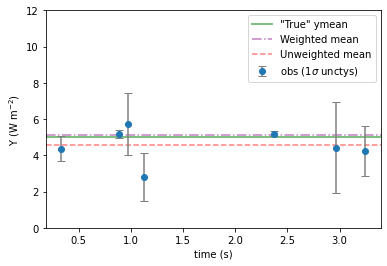

In [13]:
fig2=plt.figure(2)
ax2=fig2.add_subplot(111)
dum = ax2.errorbar(t,ymeas, sigma, linestyle='None', marker='o', ecolor='0.5', capsize=4, \
                  label=r'obs (1$\sigma$ unctys)', zorder=5)
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Y (W m$^{-2}$)')

# let's show the "true" mean value
_ = ax2.axhline(ymean, linestyle='-', lw=2, alpha=0.5, zorder=1, color='green', label='"True" ymean')

# what about the weighted average?
_ = ax2.axhline(wtav, linestyle='-.', alpha=0.5, zorder=2, color='purple', label='Weighted mean')

_ = ax2.axhline(mu, linestyle='--', alpha=0.5, zorder=2, color='red', label='Unweighted mean')


# we'll zoom out a little 
ax2.set_ylim(0,12)

leg=ax2.legend()


## Plotting some functional form ##

Some environments (like Mathematica) make intelligent guesses about the independent variable which we want to manipulate. In most others, like python, we have to generate that ourselves. That's easy, though:

In [14]:
# I couldn't remember if it was np.arange or np.linspace I wanted for this:
# help(np.linspace)
# help(np.arange)

In [15]:
# Suppose we want to plot some f(x). First we generate x
nfine = 1000
x = np.linspace(-3., 3., nfine, endpoint=True)

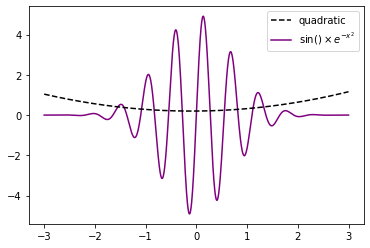

In [16]:
fig3=plt.figure(3)
ax3=fig3.add_subplot(111)

dum1 = ax3.plot(x, 0.1*x**2 + 0.02*x + 0.2, color='black', ls='--', zorder=5, label='quadratic')
dum2 = ax3.plot(x, np.sin(np.degrees(0.2*x))*5.*np.exp(0.-x**2), color='purple', ls='-', \
                zorder=2, label=r'$\sin( ) \times e^{-x^2}$')

leg=ax3.legend()

ax3.set_label('x')
ax3.set_label('y')

## Comments ##

There are **lots** of ways to customize plots - see the Matplotlib documentation and the inline help on the functions for more. But this should get you started with the computer problems in the homework for ASTR 330.

One point is worth mentioning: you very rarely (at least at this level!) need to loop through array elements. The machinery under the hood in **numpy** does this for you. For example, **np.sum(x1)** would sum along all the elements of the array **x1**. Were x1 a multi-dimensional array, you could specify which axis you want to sum over, etc.